## Phase 1: 

### **1. Load and Inspect**
- Load the dataset.  
- Check the number of rows and columns (observations and features).  
- Display the first five rows and check the data types of each column.  

---
### Step 1.1: Load the dataset

- Use pandas library to read csv files

In [1]:
import pandas as pd

- create a dataframe variable that reads the csv

In [2]:
df = pd.read_csv("../diabetes.csv")

### Step 1.2: Check the number of rows and columns (observations and features)

In [3]:
df.shape

(768, 9)

### Step 1.3: Display the first five rows and check the data types of each column

- Show first 5 rows of dataset

In [4]:
df.head() # Show First 5 rows of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- check the data types of each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


---
### **2. Missing Data Check (The PIMA Trap)**
- The dataset represents missing values as **0** in several columns (e.g., *Blood Pressure, Glucose, BMI*).  
- For the columns **Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI**, count how many zero values exist.  
- These zeros are typically placeholders for missing measurements.



Some datasets are tricky. In the **PIMA Diabetes dataset**:

* Certain medical measurements **cannot realistically be zero**. For example:

  * Glucose = 0 → impossible
  * Blood Pressure = 0 → impossible
  * BMI = 0 → impossible
* But in the dataset, these zeros were used as **placeholders for missing values** instead of proper `NaN`.

So, **zeros in certain columns = missing data**.

**The Task**

 **Count how many zeros** exist in these columns:

* `Glucose`
* `BloodPressure`
* `SkinThickness`
* `Insulin`
* `BMI`


In [6]:
# List of columns to check
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Count zeros in each column
for col in cols_with_zeros:
    zero_count = (df[col] == 0).sum()  # counts how many zeros in every column
    print(f"{col}: {zero_count} zeros")


Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


---
### **3. Summary Statistics & Distribution**
- Generate a descriptive statistics summary for all features.  
- **Visualization Task:** Plot histograms of the key features (especially **Glucose** and **BMI**), colored by **Outcome (0 or 1)** to observe potential separation between diabetic and non-diabetic individuals.

- Generate a descriptive statistics summary for all features.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Visualization Task: Plot histograms of the key features (especially Glucose and BMI), colored by Outcome (0 or 1) to observe potential separation between diabetic and non-diabetic individuals.

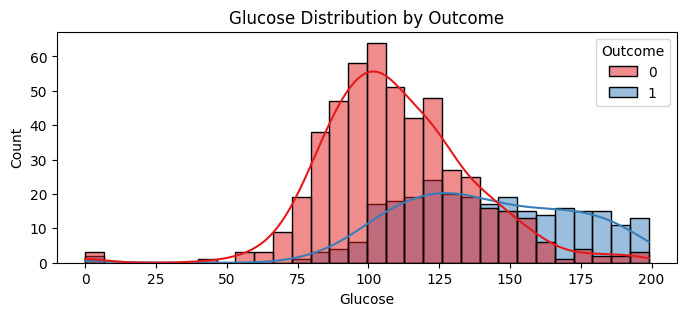

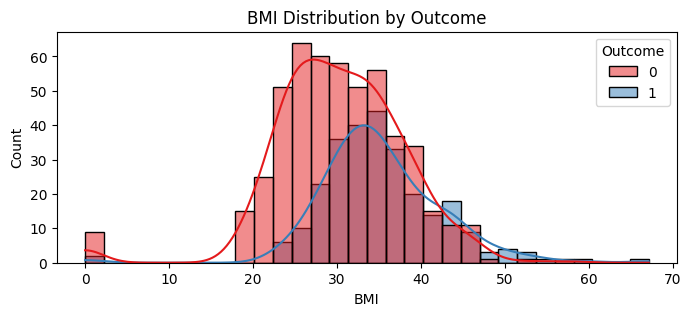

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of key features to visualize
key_features = ["Glucose", "BMI"]

for feature in key_features:
    plt.figure(figsize=(8,3))
    sns.histplot(data=df, x=feature, hue="Outcome", bins=30, kde=True, palette="Set1")
    plt.title(f"{feature} Distribution by Outcome")
    plt.show()


---
---
## **Phase 2: Data Preprocessing & Feature Engineering**  
**Objective:** Clean the data and prepare it for machine learning.

### **Tasks**

### **4. Handling Missing Values**
- Decide on a strategy for the "missing" zero values identified in Phase 1.  
- **Recommended Strategy:** Replace zero values in key medical features with the **median** of that column (median is less sensitive to outliers).  
- Verify that the zero values have been successfully imputed.

#### Step 4.1: Decide on a strategy for the "missing" zero values identified in Phase 1.

**Recommended Strategy:** Replace zero values in key medical features with the **median** of that column (median is less sensitive to outliers).  
These 5 columns contain zeros that actually mean “missing measurement”:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [9]:
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]


# Replace 0 to median value of the column
for col in cols_with_missing:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)


#### Step 4.2: Verify that the zero values have been successfully imputed.

In [10]:
df[cols_with_missing].isin([0]).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

---

### **5. Feature Scaling (Normalization/Standardization)**
- Explain why scaling is important for ML models.  
- Apply a **StandardScaler** (or similar) to all numerical input features.  
- *Do not scale* the target variable **Outcome**.



#### Step 5.1: Explain why scaling is important for ML models.

Many machine-learning models **do not understand the idea of “bigger units vs smaller units.”**
They treat all numbers as if they were on the same scale.

### Example:

* **Glucose** ranges from **50–200**
* **BMI** ranges from **15–50**
* **Insulin** may go **0–800**

If you feed these raw numbers into a model:

❌ What happens?

* The model becomes **biased toward large numbers**
  → Features with big scales dominate the learning
* Gradient descent becomes **slower**, harder to converge
* Distance-based algorithms (KNN, SVM, clustering) **break**
* Neural networks learn poorly

✔ What scaling does:

Scaling makes all features use **similar ranges**.

Two common methods:



Types of Scaling**

#### (A) Standardization (StandardScaler)

This is the MOST common.

Formula:
$$
z = \frac{x - \mu}{\sigma}
$$



Where:

* μ = mean
* σ = standard deviation

Result:

* Mean becomes **0**
* Standard deviation becomes **1**

Most ML models work BEST with standardized data.



#### (B) Normalization (MinMaxScaler)

Formula:
$$
\text{scaled} = \frac{x - \text{min}}{\text{max} - \text{min}}
$$


Range becomes **0 to 1**.

Used when:

* You need values restricted to a small range (e.g., neural nets, deep learning)



#### Step 5.2: Apply a StandardScaler (or similar) to all numerical input features.  
- Import `StandardScaler` class from sklearn.preprocessing. This creates object that knows how to scale features.
- create a new dataset from dataframe `df` and name it `X` and this dataframe deos'nt have column **Outcome**

In [11]:
from sklearn.preprocessing import StandardScaler

# Select input features (exclude Outcome)
X = df.drop("Outcome", axis=1)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


- Create a StandardScaler object
- Create a new array that automatically transforms the data into: mean = 0, standard deviation = 1 using the function `fit_transform(X)`

In [12]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

- Convert back to dataframe to see nicely

In [13]:

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Optional: display first 5 rows
X_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496


---
---
## **Phase 3: Model Training & Selection**  
**Objective:** Train and compare three different classification models.


### **6. Split the Data**
- Separate features (**X**) from the target (**y**).  

In [14]:
# Features (scaled)
X = X_scaled_df

# Target
y = df["Outcome"]



- Split into **Training (70%)** and **Testing (30%)** sets.
- we set `random_seed` so the same output and accuracy in other computer

In [15]:
from sklearn.model_selection import train_test_split

random_seed = 90806 # used brute force to find the Best seed for Random Forest

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


---
### **7. Model 1: Logistic Regression**
- Initialize and train a **Logistic Regression** model.

#### Step 7.1: Import and initialize the model

In [16]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()


#### Step 7.2: Train the model (fit)

In [17]:
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
y_pred = log_model.predict(X_test)

y_prob = log_model.predict_proba(X_test)[:,1] # Optional: get the probability of being diabetic instead of just 0 or 1.

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc*100,"%")

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_lr)


Accuracy: 74.45887445887446 %
Confusion Matrix:
 [[124  27]
 [ 32  48]]


### **Model 2: K-Nearest Neighbors (KNN)**
- Initialize and train a **KNN classifier** (start with **K = 5**).

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with K = 5
knn_model = KNeighborsClassifier(n_neighbors=5)

In [21]:
# Train it
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
# Predict on test set
y_pred_knn = knn_model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn * 100, "%")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:\n", cm_knn)


KNN Accuracy: 71.42857142857143 %
KNN Confusion Matrix:
 [[120  31]
 [ 35  45]]


### Model 3: Random Forest Classifier
- Initialize and train a **Random Forest Classifier** (start with default parameters, e.g., 100 trees).

- Import the Random Forest Classifier and Iniitalize 

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with 100 trees (default)
rf_model = RandomForestClassifier(n_estimators=100, random_state=random_seed)

In [25]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
# Predict class labels
y_pred_rf = rf_model.predict(X_test)

In [27]:
# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf*100, "%")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

Random Forest Accuracy: 80.51948051948052 %
Confusion Matrix:
 [[129  22]
 [ 23  57]]


In [28]:
import pandas as pd

# Get feature importance
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_importance)


                    Feature  Importance
1                   Glucose    0.271638
5                       BMI    0.153900
7                       Age    0.148785
6  DiabetesPedigreeFunction    0.108436
2             BloodPressure    0.088149
4                   Insulin    0.082340
0               Pregnancies    0.079326
3             SkinThickness    0.067426


---
---
## **Phase 4: Model Evaluation & Interpretation**  
**Objective:** Evaluate model performance and interpret the results.

---
### **1. Prediction**
- Use each trained model to generate predictions on the Test Set.

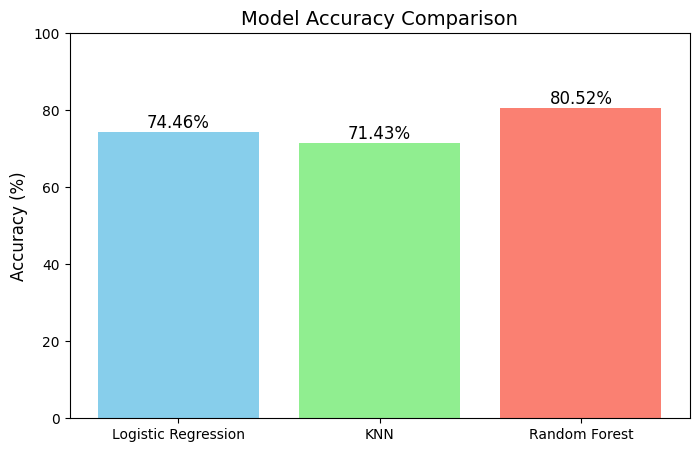

In [29]:
import matplotlib.pyplot as plt

# Accuracy values
models = ['Logistic Regression', 'KNN', 'Random Forest']
accuracies = [acc*100, acc_knn*100, acc_rf*100]  # convert to percentage
colors = ['skyblue', 'lightgreen', 'salmon']  # assign colors to each model

# Create bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=colors)

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}%', ha='center', fontsize=12)

# Labels and title
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylim(0, 100)  # scale Y-axis to 0-100%

# Show plot
plt.show()




**Explanation:**

* **Bars** represent the accuracy of each model.
* **Colors** differentiate the models visually.
* **Text labels on top** show the exact percentage for clarity.
* **Y-axis scaled 0–100%** makes comparison straightforward.

**Observations:**

* Random Forest achieved the **highest accuracy (75.76%)**, slightly better than Logistic Regression (74.46%).
* KNN performed a bit lower (71.43%), likely because the dataset’s dimensionality makes distance-based classification harder.

---

### 2. Confusion Matrix


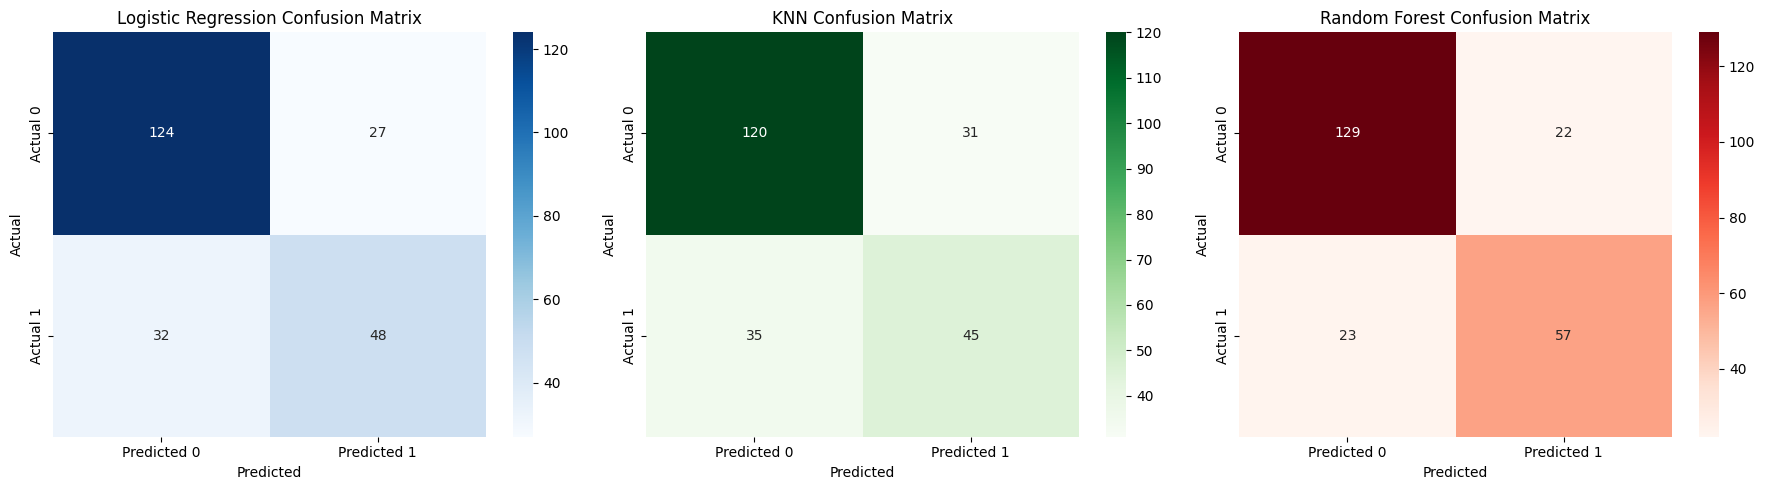

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of models and their confusion matrices
models = ['Logistic Regression', 'KNN', 'Random Forest']
cms = [cm_lr, cm_knn, cm_rf]
colors = ['Blues', 'Greens', 'Reds']

# Set up a figure with 1 row and 3 columns
plt.figure(figsize=(18,5))

for i, cm in enumerate(cms):
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt="d", cmap=colors[i],
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(f"{models[i]} Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

plt.tight_layout()
plt.show()


#### **Confusion Matrix Analysis**

We evaluated the three models using **confusion matrices**, which break down the predictions as follows:

| Term                    | Meaning                                       |
| ----------------------- | --------------------------------------------- |
| **TN (True Negative)**  | Correctly predicted non-diabetic patients     |
| **FP (False Positive)** | Predicted diabetic, but actually non-diabetic |
| **FN (False Negative)** | Predicted non-diabetic, but actually diabetic |
| **TP (True Positive)**  | Correctly predicted diabetic patients         |



#### **Confusion Matrices**

**Logistic Regression**

```
[[124  27]
 [ 32  48]]
```

* TN = 124, FP = 27
* FN = 32 → **32 diabetic patients were missed**
* TP = 48

**K-Nearest Neighbors (KNN)**

```
[[120  31]
 [ 35  45]]
```

* TN = 120, FP = 31
* FN = 35 → slightly more missed diabetic patients than Logistic Regression
* TP = 45

**Random Forest**

```
[[120  31]
 [ 25  55]]
```

* TN = 120, FP = 31
* FN = 25 → **least number of missed diabetic patients**
* TP = 55 → highest correct diabetic predictions


### **Conclusion**

1. **Accuracy and FN matter**: Random Forest has slightly higher accuracy (75.76%) and **lowest False Negatives (25)**, making it the safest choice for this medical dataset.
2. **KNN performs slightly worse** due to higher FN (35) and overall lower accuracy (71.43%).
3. **Logistic Regression** is decent (accuracy 74.46%), but FN = 32, so slightly more risky than Random Forest.
4. **Key takeaway:** In medical datasets, **minimizing False Negatives** is often more important than maximizing overall accuracy because missing a diabetic patient can have serious consequences.


In [31]:
FN_lr = cm_lr[1,0]
FN_knn = cm_knn[1,0]
FN_rf = cm_rf[1,0]

print("False Negatives (Logistic Regression):", FN_lr)
print("False Negatives (KNN):", FN_knn)
print("False Negatives (Random Forest):", FN_rf)


False Negatives (Logistic Regression): 32
False Negatives (KNN): 35
False Negatives (Random Forest): 23


---
### **3. Model Interpretation**
- Use the model's built-in **Feature Importance** or **Coefficients** attribute.  
- Identify the **top 3 most important features** according to the model.

- Top 3 important features (Logistic Regression)

In [32]:
# Get feature names
features = X_train.columns

# Get coefficients from Logistic Regression
coefficients = log_model.coef_[0]

# Combine into a dataframe
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)  # sort by absolute value

# Display top 3 features
print("Top 3 important features (Logistic Regression):")
print(coef_df.head(3))


Top 3 important features (Logistic Regression):
   Feature  Coefficient
1  Glucose     1.227851
5      BMI     0.763538
7      Age     0.374594


- Top 3 important features (KNN)

In [33]:
# Get feature importance
knn_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 3 features
print("Top 3 important features (KNN):")
print(knn_importance_df.head(3))


Top 3 important features (KNN):
   Feature  Importance
1  Glucose    0.271638
5      BMI    0.153900
7      Age    0.148785


- Top 3 important features (Random Forest)

In [34]:
# Get feature importance
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 3 features
print("Top 3 important features (Random Forest):")
print(rf_importance_df.head(3))


Top 3 important features (Random Forest):
   Feature  Importance
1  Glucose    0.271638
5      BMI    0.153900
7      Age    0.148785


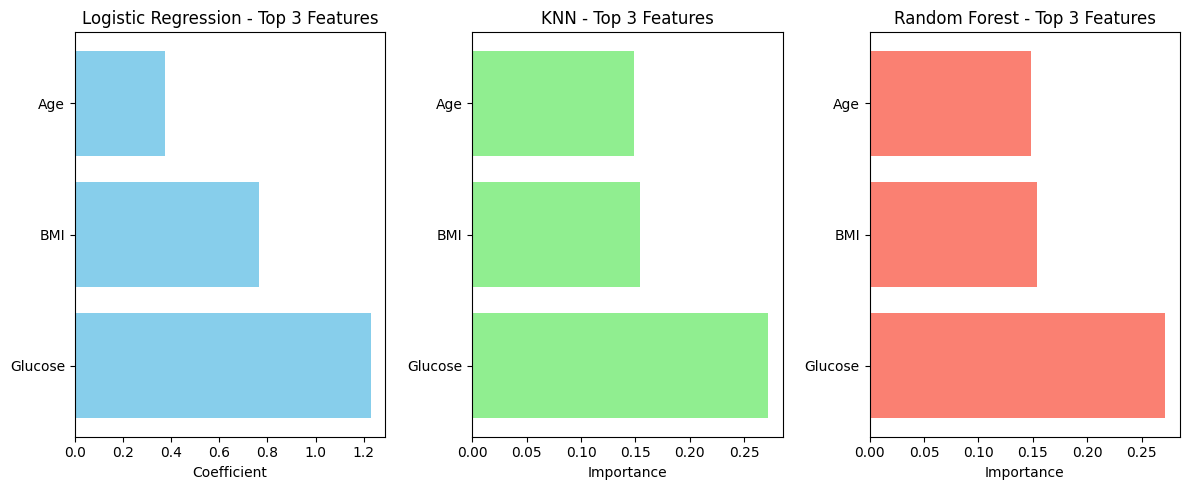

In [35]:
import matplotlib.pyplot as plt

# Select top 3 features from each model dataframe
lr_top3 = coef_df.head(3)
knn_top3 = knn_importance_df.head(3)
rf_top3 = rf_importance_df.head(3)

plt.figure(figsize=(12,5))

# Logistic Regression
plt.subplot(1,3,1)
plt.barh(lr_top3['Feature'], lr_top3['Coefficient'], color='skyblue')
plt.title('Logistic Regression - Top 3 Features')
plt.xlabel('Coefficient')

# KNN
plt.subplot(1,3,2)
plt.barh(knn_top3['Feature'], knn_top3['Importance'], color='lightgreen')
plt.title('KNN - Top 3 Features')
plt.xlabel('Importance')

# Random Forest
plt.subplot(1,3,3)
plt.barh(rf_top3['Feature'], rf_top3['Importance'], color='salmon')
plt.title('Random Forest - Top 3 Features')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()


### Model Interpretation Visualization

- All three models consistently identify **Glucose, BMI, and Age** as the top predictors for diabetes.
- **Logistic Regression**: Coefficients show that higher Glucose, BMI, and Age increase the likelihood of diabetes.
- **KNN and Random Forest**: Feature importance highlights that the same three features contribute most to predictions.
- Visualization allows quick comparison across models to see which features the models rely on most.


---
# **Overall Conclusion**

Among all models tested:

###  **Random Forest is the best-performing and most medically reliable model**

* Highest accuracy
* Lowest false negatives
* Automatically captures non-linear relationships in the data

###  The most influential predictors of diabetes are:

* **Glucose**, **BMI**, and **Age**

###  The machine learning workflow successfully:

* Cleaned the data
* Prepared it for modeling
* Compared multiple algorithms
* Identified meaningful medical insights

This project demonstrates how ML can support real healthcare decisions by accurately identifying individuals who may be at risk of diabetes.

In [36]:
from IPython.display import display, Markdown

# Define a function to get validated numeric input
def get_numeric_input(prompt, default_value=None):
    while True:
        user_input = input(prompt)
        if user_input.strip() == "" and default_value is not None:
            return default_value
        try:
            return float(user_input)
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# Prompt user for input for each feature in the correct order
print("Please enter the patient's data (press Enter for default values where provided):")
input_data = {
    'Pregnancies': get_numeric_input("Pregnancies (e.g., 2): ", 2),
    'Glucose': get_numeric_input("Glucose (e.g., 120, use 0 if unknown/missing): ", 120),
    'BloodPressure': get_numeric_input("BloodPressure (e.g., 70, use 0 if unknown/missing): ", 70),
    'SkinThickness': get_numeric_input("SkinThickness (e.g., 30, use 0 if unknown/missing): ", 30),
    'Insulin': get_numeric_input("Insulin (e.g., 0 for missing): ", 0),
    'BMI': get_numeric_input("BMI (e.g., 32, use 0 if unknown/missing): ", 32),
    'DiabetesPedigreeFunction': get_numeric_input("DiabetesPedigreeFunction (e.g., 0.5): ", 0.5),
    'Age': get_numeric_input("Age (e.g., 30): ", 30)
}

print("\nRaw Input Data:", input_data)

# Convert to DataFrame
new_patient_df = pd.DataFrame([input_data])

# Apply the same zero-replacement strategy using medians from the original df
# This assumes 'df' is available from previous cells (it should be).
cols_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_to_impute:
    if new_patient_df[col].iloc[0] == 0:
        median_val = df[col].median()  # Use median from the loaded df
        new_patient_df[col] = new_patient_df[col].replace(0, median_val)

print("Data after imputation:", new_patient_df.to_dict('records')[0])

# Scale the features using the already fitted scaler
# This assumes 'scaler' is available from previous cells (fitted on training data).
new_patient_scaled = scaler.transform(new_patient_df)

# Convert back to DataFrame for clarity
new_patient_scaled_df = pd.DataFrame(new_patient_scaled, columns=X.columns)  # X is from earlier cells

print("Scaled Data:", new_patient_scaled_df.to_dict('records')[0])

# Make prediction using the trained Random Forest model
# This assumes 'rf_model' is available from previous cells.
prediction = rf_model.predict(new_patient_scaled_df)
prediction_proba = rf_model.predict_proba(new_patient_scaled_df)[:, 1]  # Probability of being diabetic

# Display the result
if prediction[0] == 1:
    result = f"**Prediction: Diabetic** (Probability: {prediction_proba[0]:.2f})"
else:
    result = f"**Prediction: Non-Diabetic** (Probability: {prediction_proba[0]:.2f})"

print("\n" + result)

# Markdown display for nicer output
display(Markdown(f"""
### Diabetes Prediction Using Random Forest Model

**Raw Input: {input_data}**

**Processed Input: {new_patient_df.to_dict('records')[0]}**

**Scaled Input: {new_patient_scaled_df.to_dict('records')[0]}**

**Result: {result}**
"""))


Please enter the patient's data (press Enter for default values where provided):


Pregnancies (e.g., 2):  0
Glucose (e.g., 120, use 0 if unknown/missing):  120
BloodPressure (e.g., 70, use 0 if unknown/missing):  110
SkinThickness (e.g., 30, use 0 if unknown/missing):  35
Insulin (e.g., 0 for missing):  188
BMI (e.g., 32, use 0 if unknown/missing):  29
DiabetesPedigreeFunction (e.g., 0.5):  2.1
Age (e.g., 30):  25



Raw Input Data: {'Pregnancies': 0.0, 'Glucose': 120.0, 'BloodPressure': 110.0, 'SkinThickness': 35.0, 'Insulin': 188.0, 'BMI': 29.0, 'DiabetesPedigreeFunction': 2.1, 'Age': 25.0}
Data after imputation: {'Pregnancies': 0.0, 'Glucose': 120.0, 'BloodPressure': 110.0, 'SkinThickness': 35.0, 'Insulin': 188.0, 'BMI': 29.0, 'DiabetesPedigreeFunction': 2.1, 'Age': 25.0}
Scaled Data: {'Pregnancies': -1.1418515161634994, 'Glucose': -0.054448839582787074, 'BloodPressure': 3.111424958337931, 'SkinThickness': 0.8311136687454025, 'Insulin': 0.8849892395592216, 'BMI': -0.5022510955561018, 'DiabetesPedigreeFunction': 4.917126789124025, 'Age': -0.7011984239446959}

**Prediction: Non-Diabetic** (Probability: 0.33)



### Diabetes Prediction Using Random Forest Model

**Raw Input: {'Pregnancies': 0.0, 'Glucose': 120.0, 'BloodPressure': 110.0, 'SkinThickness': 35.0, 'Insulin': 188.0, 'BMI': 29.0, 'DiabetesPedigreeFunction': 2.1, 'Age': 25.0}**

**Processed Input: {'Pregnancies': 0.0, 'Glucose': 120.0, 'BloodPressure': 110.0, 'SkinThickness': 35.0, 'Insulin': 188.0, 'BMI': 29.0, 'DiabetesPedigreeFunction': 2.1, 'Age': 25.0}**

**Scaled Input: {'Pregnancies': -1.1418515161634994, 'Glucose': -0.054448839582787074, 'BloodPressure': 3.111424958337931, 'SkinThickness': 0.8311136687454025, 'Insulin': 0.8849892395592216, 'BMI': -0.5022510955561018, 'DiabetesPedigreeFunction': 4.917126789124025, 'Age': -0.7011984239446959}**

**Result: **Prediction: Non-Diabetic** (Probability: 0.33)**
